# Matrix Multiplication and Eigen Computations


Here we are computing Eigen Values and Eigen Vectors of a Real Matrix
- Power Method
- Variations of Power Method (Inverse, Shifted)
- QR Method

## Power Method

See [Wikipedia article on Power Iteration](https://en.wikipedia.org/wiki/Power_iteration): 

- $A$ : $n \times n$ real matrix.
- Assumptions:
  1. $A$ has a full set of eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_n$.
  2. $|\lambda_1| > |\lambda_2| \geq |\lambda_i|, 3 \leq i \leq n$

**Power Iteration:**

1. Pick an arbitary unit vector $v_0 \in \mathbb R^n$
2. Repeat the iteration $v_{t+1} = \frac{Av_t}{\lVert Av_t \lVert}$ till it converges

Once it converges, $v_t$ is very close to the eigenvector of $A$ corresponding to the eigenvalue $\lambda_1$

*Rate of convergence:* $\frac{|\lambda_2|}{|\lambda_1|}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Write the power iteration function

def power_iteration(A, num_iterations=20):
    v = np.random.rand(A.shape[1])
    for t in range(num_iterations):
        u = A @ v  # np.matmul(A, v)
        v = u / np.linalg.norm(u)

    l = v.T @ (A @ v)
    return v, l

# Power Iteration function which starts from a given vector


def power_iteration_seed(A, v0, num_iterations=20):
    v = v0
    for t in range(num_iterations):
        u = A @ v
        v = u / np.linalg.norm(u)

    l = v.T @ (A @ v)
    return v, l

In [3]:
# Use power iteration to compute the largest eigenvalue of a matrix
# and compare it with the result using np.linalg.eig()

A = np.array([[0.5, 0.5], [0.2, 0.8]])
print(A)
v1, l1 = power_iteration(A)

print(f'Eigenvalue with largest magnitude: {l1:.4f}')
print('Corresponding Eigenvector:', v1)

# Compare with result from np.linalg.eig()
E, V = np.linalg.eig(A)
print("Eigenvalues:\n", E)
print("Eigenvectors: \n", V)

[[0.5 0.5]
 [0.2 0.8]]
Eigenvalue with largest magnitude: 1.0000
Corresponding Eigenvector: [0.70710678 0.70710678]
Eigenvalues:
 [0.3 1. ]
Eigenvectors: 
 [[-0.92847669 -0.70710678]
 [ 0.37139068 -0.70710678]]


In [4]:
# When can power iteration go wrong
v0 = V[:, 0].T
v1, l1 = power_iteration_seed(A, v0)

print(f'Eigenvalue with largest magnitude: {l1:.4f}')
print('Corresponding Eigenvector:', v1)

Eigenvalue with largest magnitude: 0.3000
Corresponding Eigenvector: [-0.92847615  0.37139203]


### In Case if Power Method Fails

In [5]:
# More than one eigenvalue with the largest magnitude

th = np.pi/6
A = np.array([[0.5, 0, 0], [0, np.cos(th), -np.sin(th)],
             [0, np.sin(th), np.cos(th)]])
print(A)

v1, l1 = power_iteration(A)

print(f'Eigenvalue with largest magnitude: {l1:.4f}')
print('Corresponding Eigenvector:', v1)

# Compare with result from np.linalg.eig()
E, V = np.linalg.eig(A)
print("Eigenvalues:\n", E)
print("Eigenvectors: \n", V)

[[ 0.5        0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]
Eigenvalue with largest magnitude: 0.8660
Corresponding Eigenvector: [ 3.69862736e-07  5.54655913e-01 -8.32079815e-01]
Eigenvalues:
 [0.8660254+0.5j 0.8660254-0.5j 0.5      +0.j ]
Eigenvectors: 
 [[0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]
 [0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]]


### Convergence of Power Iteration

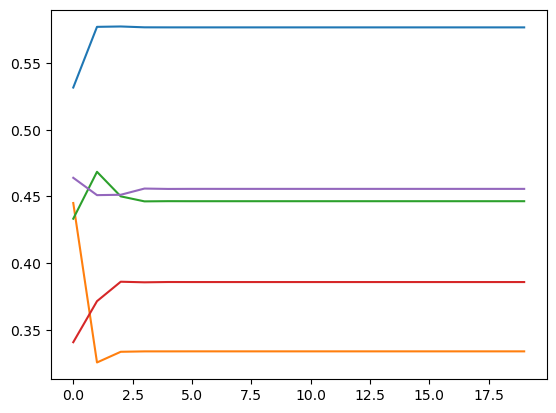

In [6]:
# Observe the convergence pattern of the power iteration by plotting
# the vector after each iteration component-wise

def power_iteration_convergence(A, num_iterations=20):
    vEvolves = np.zeros((A.shape[1], num_iterations))
    v = np.random.rand(A.shape[1])
    for t in range(num_iterations):
        u = A @ v
        v = u / np.linalg.norm(u)
        vEvolves[:, t] = v

    plt.plot(vEvolves.T)


A = np.random.rand(5, 5)
power_iteration_convergence(A)

Eigenvalues:
 [0.99862953+0.05233596j 0.99862953-0.05233596j]
Eigenvectors: 
 [[0.        +0.70710678j 0.        -0.70710678j]
 [0.70710678+0.j         0.70710678-0.j        ]]
[[ 0.99862953 -0.05233596]
 [ 0.05233596  0.99862953]]


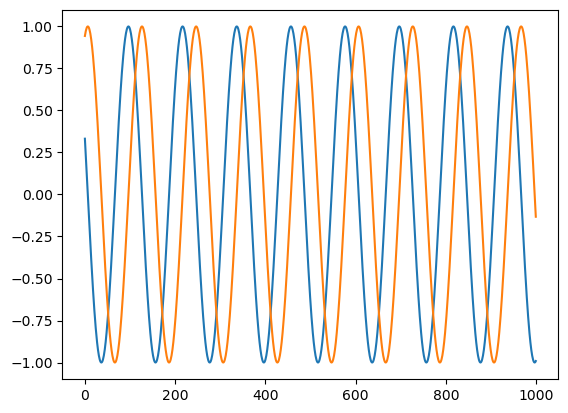

In [7]:
# Component-wise plot in a case where the power iteration fails

th = np.pi/60
A = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

# Result from np.linalg.eig()
E, V = np.linalg.eig(A)
print("Eigenvalues:\n", E)
print("Eigenvectors: \n", V)
print(A)

power_iteration_convergence(A, 1000)

### Inverse Power Method

In [8]:
# Task 1a. Find the eigenvalue with the smallest magnitude and the
# corresponding eigenvector using power itertion for the given matrix
# Compare the result with linalg.eig()
def inverse_power_iteration(A, num_iterations=100):
    n = A.shape[1]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    for _ in range(num_iterations):
        u = np.linalg.solve(A, v)
        v = u / np.linalg.norm(u)
    eigenvalue = v.T @ A @ v  # Rayleigh quotient for A
    return v, eigenvalue


# Given matrix A
th = np.pi/6
A = np.array([
    [0.5, 0, 0],
    [0, np.cos(th), -np.sin(th)],
    [0, np.sin(th), np.cos(th)]
])

# Compute using inverse power method
v_small, l_small = inverse_power_iteration(A, num_iterations=100)

# Compare with numpy's eig
E, V = np.linalg.eig(A)

print("Inverse Power Method Results:")
print(f"Smallest Eigenvalue: {l_small:.4f}")
print("Corresponding Eigenvector:\n", v_small)
print("\nnp.linalg.eig Results:")
print("Eigenvalues:\n", E)
print("Eigenvectors (columns):\n", V)

Inverse Power Method Results:
Smallest Eigenvalue: 0.5000
Corresponding Eigenvector:
 [ 1.00000000e+00  1.43537269e-31 -5.62915408e-31]

np.linalg.eig Results:
Eigenvalues:
 [0.8660254+0.5j 0.8660254-0.5j 0.5      +0.j ]
Eigenvectors (columns):
 [[0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]
 [0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]]


In [9]:
# Task 1b. Find the eigenvalue nearest to 1 and the
# corresponding eigenvector using power itertion for the given matrix
# Compare the result with linalg.eig()

def shifted_inverse_power(A, sigma, num_iterations=1000, tol=1e-10):
    n = A.shape[0]
    B = A - sigma * np.eye(n)
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iterations):
        try:
            u = np.linalg.solve(B, v)
        except np.linalg.LinAlgError:
            return v, sigma
        v_new = u / np.linalg.norm(u)
        if np.linalg.norm(v_new - v) < tol:
            break
        v = v_new

    # Compute eigenvalue using Rayleigh quotient
    mu = (v.T @ B @ v) / (v.T @ v)
    lambda_A = sigma + mu
    return v, lambda_A


# Given matrix A
A = np.array([
    [0.17452104, 0.69752617, 0.58067469, 1.30159768, 1.16944494],
    [0.69752617, 1.83217498, 0.86335401, 1.37726111, 0.47197377],
    [0.58067469, 0.86335401, 1.42367935, 1.70622102, 0.52668159],
    [1.30159768, 1.37726111, 1.70622102, 1.52025199, 0.51860264],
    [1.16944494, 0.47197377, 0.52668159, 0.51860264, 0.24411477]
])

# Compute using shifted inverse power method
sigma = 1
v_shifted, lambda_shifted = shifted_inverse_power(A, sigma)

# Compare with numpy's eig
E, V_np = np.linalg.eig(A)
closest_idx = np.argmin(np.abs(E - sigma))
lambda_closest = E[closest_idx]
v_closest = V_np[:, closest_idx]

print("Shifted Inverse Power Method Results:")
print(f"Eigenvalue closest to {sigma}: {lambda_shifted:.6f}")
print("Corresponding Eigenvector:\n", v_shifted)
print("\nnp.linalg.eig Results:")
print("All Eigenvalues (sorted):\n", np.sort(E))
print(f"Closest eigenvalue to {sigma}: {lambda_closest:.6f}")
print("Corresponding Eigenvector:\n", v_closest)

# Verify eigenpair correctness
Av = A @ v_shifted
lambda_v = lambda_shifted * v_shifted
print("\nVerification:")
print("||A*v - λ*v||:", np.linalg.norm(Av - lambda_v))
print("Dot product with numpy's eigenvector:",
      abs(np.dot(v_shifted, v_closest)))

Shifted Inverse Power Method Results:
Eigenvalue closest to 1: 0.865557
Corresponding Eigenvector:
 [-0.14346663  0.84511398 -0.45411732 -0.17990218 -0.16313294]

np.linalg.eig Results:
All Eigenvalues (sorted):
 [-1.18740784 -0.19984541  0.66014598  0.86555685  5.05629255]
Closest eigenvalue to 1: 0.865557
Corresponding Eigenvector:
 [ 0.14346663 -0.84511398  0.45411732  0.17990218  0.16313294]

Verification:
||A*v - λ*v||: 2.4196749845665633e-16
Dot product with numpy's eigenvector: 1.0


## Finding More EigenValues Using Power Method

### Case 1. The matrix is real symmetric

A real symmetric matrix A has a set of orthogonal eigenvectors. We can decompose $A$ as
$$
    A = \lambda_1 b_1 b_1^T + \lambda_2 b_2 b_2^T + \cdots + \lambda_n b_n b_n^T
$$
where $\lambda_1 > \cdots > \lambda_n$ are the eigenvalues and $b_1, \ldots, b)n$ are the corresponding eigenvectors.


In [10]:
# Task 2. Find all the eigenvalues and eigenvectors of the
# a real symmetric matrix using the above idea and compare it
# with the result from linalg.eig()

def power_iteration(A, max_iter=1000, tol=1e-10):
    """Power iteration with convergence check using Rayleigh quotient."""
    n = A.shape[0]
    v = np.random.rand(n)
    v /= np.linalg.norm(v)
    prev_rayleigh = 0

    for _ in range(max_iter):
        u = A @ v
        v_new = u / np.linalg.norm(u)
        rayleigh = v_new.T @ A @ v_new  # Rayleigh quotient

        if np.abs(rayleigh - prev_rayleigh) < tol:
            break
        prev_rayleigh = rayleigh
        v = v_new

    # Final Rayleigh quotient and eigenvector
    eigenvector = v_new
    eigenvalue = eigenvector.T @ A @ eigenvector
    return eigenvector, eigenvalue


def symmetric_eigen_deflation(A, num_eigs=None):
    """Find eigenvalues/vectors of symmetric matrix using deflation."""
    n = A.shape[0]
    A = A.copy()
    eigs = []
    vecs = []

    for _ in range(n if num_eigs is None else num_eigs):
        v, l = power_iteration(A)
        eigs.append(l)
        vecs.append(v)
        A -= l * np.outer(v, v)  # Deflate the matrix

    return np.array(eigs), np.array(vecs).T


# Test case: Random symmetric matrix
np.random.seed(42)
A = np.random.rand(5, 5)
A = A + A.T  # Make symmetric

# Compute using deflation method
computed_eigs, computed_vecs = symmetric_eigen_deflation(A)

# Compare with numpy's eig
numpy_eigs, numpy_vecs = np.linalg.eig(A)
sorted_idx = np.argsort(numpy_eigs)[::-1]  # Sort descending
numpy_eigs_sorted = numpy_eigs[sorted_idx]
numpy_vecs_sorted = numpy_vecs[:, sorted_idx]

print("Deflation Method Results:")
print("Eigenvalues (sorted descending):\n", np.sort(computed_eigs)[::-1])
print("\nNumPy Results (sorted descending):\n", numpy_eigs_sorted)

# Verify orthogonality of computed vectors
ortho_check = computed_vecs.T @ computed_vecs
print("\nOrthogonality Check (should be near identity):")
print(np.round(ortho_check, 2))

# Verify eigenvalue correctness
print("\nEigenvalue Comparison:")
print(f"Sum of computed eigenvalues: {np.sum(computed_eigs):.6f}")
print(f"Trace of matrix: {np.trace(A):.6f}")
print(f"Sum of numpy eigenvalues: {np.sum(numpy_eigs):.6f}")

# Verify eigenpair residuals
residuals = [np.linalg.norm(A @ v - l*v)
             for v, l in zip(computed_vecs.T, computed_eigs)]
print("\nResiduals (||Av - λv||):")
print(np.round(residuals, 10))

Deflation Method Results:
Eigenvalues (sorted descending):
 [ 4.52895975  0.92223505  0.19807806 -0.02902499 -1.31408512]

NumPy Results (sorted descending):
 [ 4.52895975  0.92223505  0.19807806 -0.02902499 -1.31408512]

Orthogonality Check (should be near identity):
[[ 1.  0. -0.  0.  0.]
 [ 0.  1.  0. -0.  0.]
 [-0.  0.  1. -0. -0.]
 [ 0. -0. -0.  1.  0.]
 [ 0.  0. -0.  0.  1.]]

Eigenvalue Comparison:
Sum of computed eigenvalues: 4.306163
Trace of matrix: 4.306163
Sum of numpy eigenvalues: 4.306163

Residuals (||Av - λv||):
[7.32690e-06 2.87045e-05 1.95054e-05 6.88740e-06 1.33990e-06]


### Case 2. Shifting Method

- If $A$ has eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_n$, what are the eigenvalue of $A - \lambda_1 I$?
- Ans: $0, \lambda_2 - \lambda_1, \ldots, \lambda_n - \lambda_1$
- If this list has a unique largest magnitude value, we can find that by doing a power iteration on $A - \lambda_1I$.

In [12]:
# Finding a second eigenvalue

A = np.random.rand(5, 5)
A = A + A.T
print(A)

# Result from np.linalg.eig()
E, V = np.linalg.eig(A)
print("Eigenvalues:\n", E)
print("Eigenvectors: \n", V)

v1, l1 = power_iteration(A)

print(f'Eigenvalue with largest magnitude: {l1:.4f}')
print('Corresponding Eigenvector:', v1)

B = A - l1*np.eye(A.shape[1])
v2, l2 = power_iteration(B)
l2 = l2 + l1

print(f'Eigenvalue with second largest magnitude: {l2:.4f}')
print('Corresponding Eigenvector:', v2)

[[0.65036664 0.84920042 1.13135307 0.91864193 0.72150715]
 [0.84920042 1.42648957 1.28351788 1.19768761 1.1813501 ]
 [1.13135307 1.28351788 0.85508204 0.33977511 0.86344257]
 [0.91864193 1.19768761 0.33977511 1.01714138 1.13636464]
 [0.72150715 1.1813501  0.86344257 1.13636464 0.15395982]]
Eigenvalues:
 [ 4.76079408  0.6602557   0.14528311 -0.88191736 -0.58137607]
Eigenvectors: 
 [[ 0.39941466  0.19488379  0.70524159 -0.31104395 -0.45648023]
 [ 0.56129924  0.01620036 -0.67082527 -0.09209158 -0.47559785]
 [ 0.42507172  0.66068435  0.03671418  0.48861823  0.37777575]
 [ 0.43564579 -0.70916884  0.2220481   0.50163835  0.07966124]
 [ 0.39362148 -0.14944435 -0.04443505 -0.63591036  0.64526898]]
Eigenvalue with largest magnitude: 4.7608
Corresponding Eigenvector: [0.39941452 0.56129919 0.42507193 0.43564599 0.39362124]
Eigenvalue with second largest magnitude: -0.8819
Corresponding Eigenvector: [ 0.31106822  0.09211687 -0.48863831 -0.50164259  0.63587606]


In [13]:
# Task 3. Extend the above method to find all the eigenvalues and eigenvectors
# of a real matrix (not necessarily symmetric)
def power_iteration(A, num_iterations=1000):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    for _ in range(num_iterations):
        Av = A.dot(v)
        v = Av / np.linalg.norm(Av)
        # Rayleigh quotient for eigenvalue estimation
        lambda_est = v.dot(A.dot(v))
    return v, lambda_est


# Given matrix A
A = np.array([
    [0.36017761, 0.29899136, 0.94790805, 0.66225041, 0.05242949],
    [0.96834243, 0.38633789, 0.13144678, 0.25635183, 0.7449862],
    [0.63736823, 0.03674595, 0.7195524, 0.77701343, 0.06313019],
    [0.69311961, 0.44329579, 0.57682117, 0.53503807, 0.32678736],
    [0.27317887, 0.80795302, 0.7149457, 0.1515109, 0.40629759]])

n = A.shape[0]
B = A.copy()
eigenvalues = []
right_eigenvectors = []
left_eigenvectors = []

for _ in range(n):
    # Compute right eigenvector and eigenvalue
    v, lam = power_iteration(B)
    # Compute left eigenvector using transpose of B
    w, _ = power_iteration(B.T)
    # Normalize left eigenvector to ensure w.T @ v = 1
    scale = np.dot(w, v)
    if np.abs(scale) < 1e-10:
        scale = 1
    w = w / scale
    # Store results
    eigenvalues.append(lam)
    right_eigenvectors.append(v)
    left_eigenvectors.append(w)
    # Deflate the matrix
    B = B - lam * np.outer(v, w)

# Compute eigenvalues using numpy for comparison
E_np, V_np = np.linalg.eig(A)

# Sort eigenvalues by magnitude for comparison
eigenvalues_sorted = sorted(eigenvalues, key=lambda x: abs(x), reverse=True)
E_np_sorted = sorted(E_np, key=lambda x: abs(x), reverse=True)

print("Eigenvalues via Deflation Method (sorted by magnitude):")
print(np.array(eigenvalues_sorted))
print("\nEigenvalues via numpy.linalg.eig (sorted by magnitude):")
print(np.array(E_np_sorted))

# Check eigenvectors by verifying A*v ≈ λ*v
print("\nVerifying eigenvectors for deflation method:")
for i in range(n):
    v = right_eigenvectors[i]
    lambda_i = eigenvalues[i]
    Av = A.dot(v)
    error = np.linalg.norm(Av - lambda_i * v)
    print(f"Eigenvalue {i+1}: Error = {error:.6e}")
    
    
    

Eigenvalues via Deflation Method (sorted by magnitude):
[ 2.38237214  0.64754616 -0.6423354   0.05969511 -0.03716248]

Eigenvalues via numpy.linalg.eig (sorted by magnitude):
[ 2.38237214  0.64466334 -0.64216455  0.05969511 -0.03716248]

Verifying eigenvectors for deflation method:
Eigenvalue 1: Error = 2.220446e-16
Eigenvalue 2: Error = 2.485075e-02
Eigenvalue 3: Error = 8.796058e-03
Eigenvalue 4: Error = 7.952451e-15
Eigenvalue 5: Error = 1.194647e-14


## QR Factorisation

Any real square matrix $A$ may be decomposed as
$$ A = QR $$
where $Q$ is an orthogonal matrix (its columns are orthogonal unit vectors meaning 
$Q^T = Q^{−1}$ and $R$ is an upper triangular matrix (also called right triangular matrix).

QR factorisation of a square matrix can be computed using Gram-Schmidt orthonormalisation procedure.

In [14]:
# Compute QR factorisation using linalg.qr()

A = np.random.rand(10, 10)
Q, R = np.linalg.qr(A)

print('A = \n', A)
print('Q = \n', Q)
print('R = \n', R)

A = 
 [[0.67756436 0.01658783 0.51209306 0.22649578 0.64517279 0.17436643
  0.69093774 0.38673535 0.93672999 0.13752094]
 [0.34106635 0.11347352 0.92469362 0.87733935 0.25794163 0.65998405
  0.8172222  0.55520081 0.52965058 0.24185229]
 [0.09310277 0.89721576 0.90041806 0.63310146 0.33902979 0.34920957
  0.72595568 0.89711026 0.88708642 0.77987555]
 [0.64203165 0.08413996 0.16162871 0.89855419 0.60642906 0.00919705
  0.10147154 0.66350177 0.00506158 0.16080805]
 [0.54873379 0.6918952  0.65196126 0.22426931 0.71217922 0.23724909
  0.3253997  0.74649141 0.6496329  0.84922341]
 [0.65761289 0.5683086  0.09367477 0.3677158  0.26520237 0.24398964
  0.97301055 0.39309772 0.89204656 0.63113863]
 [0.7948113  0.50263709 0.57690388 0.49251769 0.19524299 0.72245212
  0.28077236 0.02431597 0.6454723  0.17711068]
 [0.94045858 0.95392858 0.91486439 0.3701587  0.01545662 0.92831856
  0.42818415 0.96665482 0.96361998 0.85300946]
 [0.29444889 0.38509773 0.85113667 0.31692201 0.16949275 0.55680126
  0.93

In [15]:
# Task 4. Implement the QR factorisation by hand using the
# Gram-Schmidt procedure and compare it to the above result using linalg.qr()
# Reference: https://en.wikipedia.org/wiki/QR_decomposition#Using_the_Gram%E2%80%93Schmidt_proce

def gram_schmidt_qr(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        if R[j, j] == 0:
            Q[:, j] = v
        else:
            Q[:, j] = v / R[j, j]
    return Q, R


# Given matrix A
A = np.array([
    [0.36017761, 0.29899136, 0.94790805, 0.66225041, 0.05242949],
    [0.96834243, 0.38633789, 0.13144678, 0.25635183, 0.7449862],
    [0.63736823, 0.03674595, 0.7195524, 0.77701343, 0.06313019],
    [0.69311961, 0.44329579, 0.57682117, 0.53503807, 0.32678736],
    [0.27317887, 0.80795302, 0.7149457, 0.1515109, 0.40629759]])

# Compute QR using Gram-Schmidt
Q_gs, R_gs = gram_schmidt_qr(A)

# Compute QR using numpy
Q_np, R_np = np.linalg.qr(A)

# Adjust signs for comparison
signs = np.sign(np.diag(np.dot(Q_gs.T, Q_np)))
Q_np_adjusted = Q_np * signs
R_np_adjusted = R_np * signs[:, np.newaxis]

# Calculate differences
diff_Q = np.linalg.norm(Q_gs - Q_np_adjusted)
diff_R = np.linalg.norm(R_gs - R_np_adjusted)

# Check orthogonality of Q_gs
ortho_check = np.dot(Q_gs.T, Q_gs)
# Remove diagonal for checking off-diagonal zeros
np.fill_diagonal(ortho_check, 0)

# Print results
print("Q from Gram-Schmidt:\n", Q_gs)
print("\nQ from numpy.linalg.qr (adjusted signs):\n", Q_np_adjusted)
print("\nDifference between Q matrices:", diff_Q)

print("\nR from Gram-Schmidt:\n", R_gs)
print("\nR from numpy.linalg.qr (adjusted signs):\n", R_np_adjusted)
print("\nDifference between R matrices:", diff_R)

print("\nCheck orthogonality of Q_gs (off-diagonal elements):\n", ortho_check)
print("\nCheck if Q_gs @ R_gs ≈ A:", np.allclose(Q_gs @ R_gs, A, atol=1e-8))
print("Check if Q_np @ R_np ≈ A:", np.allclose(Q_np @ R_np, A, atol=1e-8))

Q from Gram-Schmidt:
 [[ 0.25287644  0.15399259  0.65195713 -0.22179168  0.66189134]
 [ 0.67986176 -0.14235976 -0.56835388 -0.39213715  0.20180192]
 [ 0.44748869 -0.38360308  0.50159394 -0.1307692  -0.61960107]
 [ 0.48663107  0.12033207 -0.01152497  0.86092661  0.08592402]
 [ 0.19179565  0.89128494  0.0140163  -0.19682911 -0.36039898]]

Q from numpy.linalg.qr (adjusted signs):
 [[ 0.25287644  0.15399259  0.65195713 -0.22179168  0.66189134]
 [ 0.67986176 -0.14235976 -0.56835388 -0.39213715  0.20180192]
 [ 0.44748869 -0.38360308  0.50159394 -0.1307692  -0.61960107]
 [ 0.48663107  0.12033207 -0.01152497  0.86092661  0.08592402]
 [ 0.19179565  0.89128494  0.0140163  -0.19682911 -0.36039898]]

Difference between Q matrices: 4.618423283455313e-15

R from Gram-Schmidt:
 [[ 1.42432255  0.725391    1.06888339  0.97888133  0.78494685]
 [ 0.          0.75040669  0.55786598 -0.03315566  0.27925069]
 [ 0.          0.          0.9075833   0.67176287 -0.35563972]
 [ 0.          0.          0.        

## QR Algorithm for finding all eigenvalues

The following iteration
\begin{align*}
     A_i &= Q_i R_i \\
     A_{i+1} &= R_iQ_i 
\end{align*}
starting with $A_0 = A$ keeps producing matrices $A_i$ which are similar to $A$ (in the sense that their eigenvalues are same) and converges to a triangular matrix $A_t$ for sufficiently large $t$. Hence the eigenvalues of $A$ which are same as that of $A_t$ can be read out from the diagonal of $A_t$.

In [16]:
# Implement the QR iteration
def qr_iteration(A, num_iterations=20):
    for i in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q

    return np.diag(A)

In [17]:
# Compute the eigenvalues using QR algorithm

A = np.random.rand(10, 10)

Eqr = qr_iteration(A)
print("Eigenvalues returned by QR Algo \n", Eqr)

# Compare with result from linalg.eig()
E, V = np.linalg.eig(A)
print("Eigenvalues returned by linalg.eig: \n", E)

Eigenvalues returned by QR Algo 
 [ 4.79409246  1.06758972  0.25848171  0.8186838   0.06036889 -0.69905449
 -0.26276474 -0.18833758  0.02336516  0.21919503]
Eigenvalues returned by linalg.eig: 
 [ 4.79409246+0.j         -0.74114095+0.j          0.18400232+0.7970475j
  0.18400232-0.7970475j   1.02384894+0.j          0.85535715+0.j
 -0.22560559+0.27453041j -0.22560559-0.27453041j  0.12133445+0.22207593j
  0.12133445-0.22207593j]


In [18]:
# Visualising the matrices $A_i$ during the QR iteration

def qr_iteration_plot(A, num_iterations=20):
    fig = plt.subplots(4, num_iterations//4)

    for i in range(num_iterations):
        plt.subplot(4, num_iterations//4, i+1)
        plt.imshow(np.abs(A), norm='linear', cmap='gray')
        Q, R = np.linalg.qr(A)
        A = R @ Q
    return np.diag(A)

array([ 5.08489044,  1.16063741, -0.66136994, -0.91598539,  0.60341399,
       -0.10055696, -0.05218708,  0.31344432, -0.3984585 , -0.01080445])

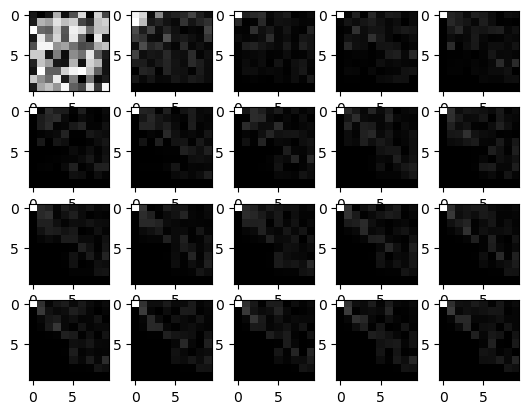

In [19]:
A = np.random.rand(10, 10)
qr_iteration_plot(A)

In [20]:
# Task 5. Study the convergence of QR algorithm by plotting the
# ratio sum(L)/sum(A) where L is the entries in the lower triangular
# portion of A (excluding the diagonal) as the iteration progresses.